(5625, 20)
tenure_group
49+ months      1782
0–12 months     1764
25–48 months    1285
13–24 months     794
Name: count, dtype: int64
charges_group
High      2868
Low       1396
Medium    1361
Name: count, dtype: int64
contract
Month-to-month    3087
Two year          1347
One year          1191
Name: count, dtype: int64

Churn Rate by Tenure Group:
churn               No       Yes
tenure_group                    
0–12 months   0.523243  0.476757
13–24 months  0.722922  0.277078
25–48 months  0.796109  0.203891
49+ months    0.903479  0.096521

Churn Rate by Monthly Charges Group:
churn                No       Yes
charges_group                    
High           0.641562  0.358438
Low            0.890401  0.109599
Medium         0.769287  0.230713

Churn Rate by Contract Type:
churn                 No       Yes
contract                          
Month-to-month  0.569485  0.430515
One year        0.894207  0.105793
Two year        0.970304  0.029696

High-Value At-Risk Customers:
    ge

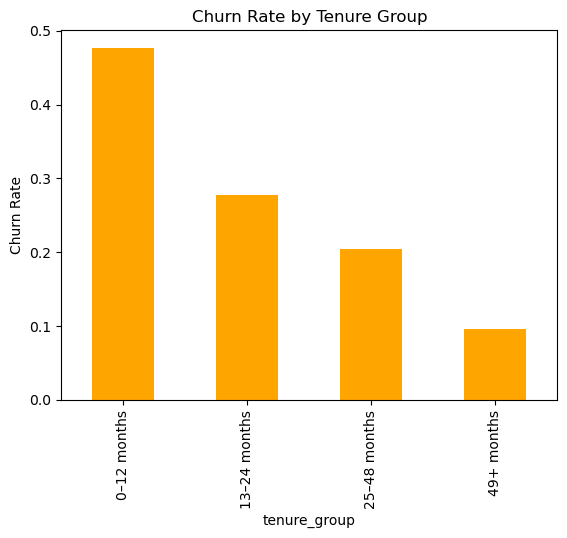

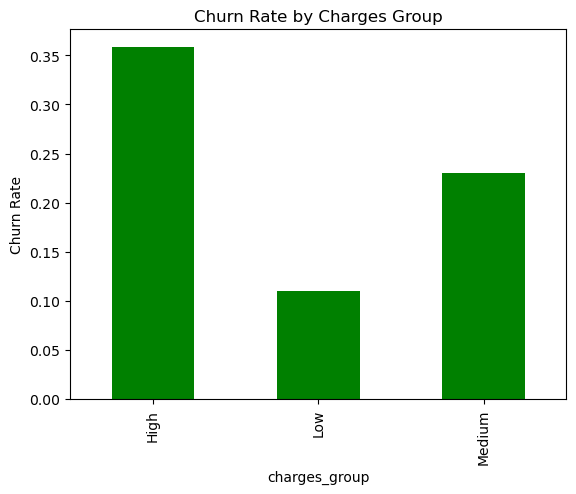

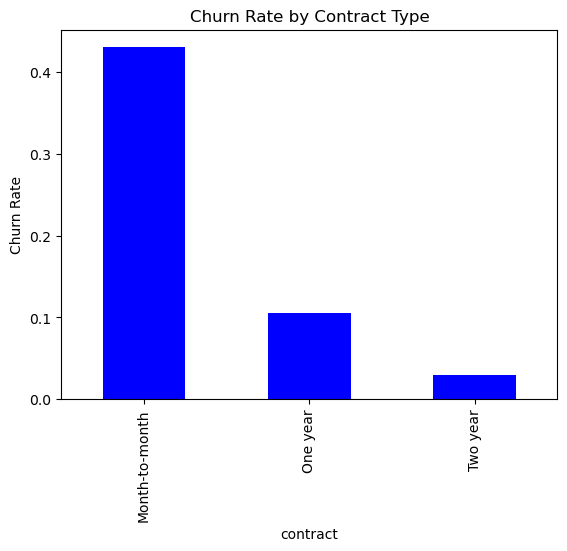

In [1]:
# Task 3: Customer Segmentation

# Step 1: Load the train.csv
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train = pd.read_csv("data/train.csv")
print(train.shape)
train.head()

# Step 2: Create Customer Segments

# 2.1 Tenure Segments
def tenure_group(tenure):
    if tenure <= 12:
        return "0–12 months"
    elif tenure <= 24:
        return "13–24 months"
    elif tenure <= 48:
        return "25–48 months"
    else:
        return "49+ months"

train['tenure_group'] = train['tenure'].apply(tenure_group)
print(train['tenure_group'].value_counts())

# 2.2 Monthly Charges Segments
def charges_group(charges):
    if charges < 35:
        return "Low"
    elif charges < 70:
        return "Medium"
    else:
        return "High"

train['charges_group'] = train['monthlycharges'].apply(charges_group)
print(train['charges_group'].value_counts())

# 2.3 Contract Type
print(train['contract'].value_counts())

# Step 3: Analyze Churn within Each Segment

# 3.1 Churn Rate by Tenure Group
tenure_churn = train.groupby('tenure_group')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Tenure Group:")
print(tenure_churn)

# 3.2 Churn Rate by Monthly Charges Group
charges_churn = train.groupby('charges_group')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Monthly Charges Group:")
print(charges_churn)

# 3.3 Churn Rate by Contract Type
contract_churn = train.groupby('contract')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Type:")
print(contract_churn)

# Step 4: Identify High-Value, High-Risk Customers
high_value_risk_customers = train[(train['charges_group'] == "High") & (train['churn'] == "Yes")]
print("\nHigh-Value At-Risk Customers:")
print(high_value_risk_customers.head())

print(f"Number of high-value at-risk customers: {high_value_risk_customers.shape[0]}")

# Step 5: Visualize Churn Across Segments

# 5.1 Churn Rate by Tenure Group
tenure_churn['Yes'].plot(kind='bar', title='Churn Rate by Tenure Group', color='orange')
plt.ylabel('Churn Rate')
plt.show()

# 5.2 Churn Rate by Charges Group
charges_churn['Yes'].plot(kind='bar', title='Churn Rate by Charges Group', color='green')
plt.ylabel('Churn Rate')
plt.show()

# 5.3 Churn Rate by Contract Type
contract_churn['Yes'].plot(kind='bar', title='Churn Rate by Contract Type', color='blue')
plt.ylabel('Churn Rate')
plt.show()


📄 Task 3: Customer Segmentation - Summary

- Segmented customers based on tenure, monthly charges, and contract type.
- Tenure groups created: 0–12 months, 13–24 months, 25–48 months, and 49+ months.
- Monthly charges groups created: Low (< ₹35), Medium (₹35–70), and High (> ₹70).
- Analyzed churn rate across different tenure groups, charges groups, and contract types.
- Identified high-value, high-risk customers — customers who pay high charges but are likely to churn.
- Visualized churn patterns using simple bar charts for easy understanding.

📊 Key Observations:

- Customers in the "0–12 months" tenure group have the highest churn rate.
- Month-to-month contract customers churn significantly more compared to one-year or two-year contracts.
- Customers with high monthly charges are at greater risk of churning and need special retention offers.
